# Baseline

In [1]:
import nltk
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.decomposition import NMF, TruncatedSVD, LatentDirichletAllocation

# Preprocessed 
## ( cleaned , tokenized, stop-word , lemmatized , stemmed )

In [2]:
root_df = pd.read_csv('root_string_df.csv')

In [3]:
root_df.head()

,twitter_id,content,removed_links,removed_users,removed_hashtags,removed_av,tokens,lemmatized,lang,stop_word,root,root_string
0,aquitainexox,@Banterm42404691 @MrHarryCole Absolutely one s...,@Banterm42404691 @MrHarryCole Absolutely one s...,Absolutely one self indulgent ego trip!! #COP26,Absolutely one self indulgent ego trip!!,Absolutely one self indulgent ego trip!!,absolutely self indulgent ego trip,absolutely self indulgent ego trip,en,"['absolutely', 'self', 'indulgent', 'ego', 'tr...","['absolut', 'self', 'indulg', 'ego', 'trip']",absolut self indulg ego trip
1,GEC_JCM_Info,"Please join us at a #COP26 side event ""Impleme...","Please join us at a #COP26 side event ""Impleme...","Please join us at a #COP26 side event ""Impleme...","Please join us at a side event ""Implementing ...","Please join us at a side event ""Implementing ...",join event implement joint credit mechanism jc...,join event implement joint credit mechanism jc...,en,"['join', 'event', 'implement', 'joint', 'credi...","['join', 'event', 'implement', 'joint', 'credi...",join event implement joint credit mechan jcm c...
2,zpnine,#India’s huge solar uptake has boosted #climat...,#India’s huge solar uptake has boosted #climat...,#India’s huge solar uptake has boosted #climat...,"’s huge solar uptake has boosted goals, says ...","’s huge solar uptake has boosted goals, says ...",huge solar uptake boost goals say minister,huge solar uptake boost goals say minister,en,"['huge', 'solar', 'uptake', 'boost', 'goals', ...","['huge', 'solar', 'uptak', 'boost', 'goal', 's...",huge solar uptak boost goal say minist
3,PGDynes,The concrete needed to accommodate 2 billion m...,The concrete needed to accommodate 2 billion m...,The concrete needed to accommodate 2 billion m...,The concrete needed to accommodate 2 billion m...,The concrete needed to accommodate 2 billion m...,concrete need accommodate billion people citie...,concrete need accommodate billion people citie...,en,"['concrete', 'need', 'accommodate', 'billion',...","['concret', 'need', 'accommod', 'billion', 'pe...",concret need accommod billion peopl citi year ...
4,Xplorit,#WestVirginia Senator &amp; Ennersystams fraud...,#WestVirginia Senator &amp; Ennersystams fraud...,#WestVirginia Senator &amp; Ennersystams fraud...,Senator &amp; Ennersystams fraud . gets a pro...,Senator &amp; Ennersystams fraud . gets a pro...,senator amp ennersystams fraud get proper welc...,senator amp ennersystams fraud get proper welc...,en,"['senator', 'ennersystams', 'fraud', 'get', 'p...","['senat', 'ennersystam', 'fraud', 'get', 'prop...",senat ennersystam fraud get proper welcom worl...


In [4]:
root_df['content'][0]

'@Banterm42404691 @MrHarryCole Absolutely one self indulgent ego trip!! #COP26'

In [5]:
root_df['root_string'][0]

'absolut self indulg ego trip'

In [6]:
stop_words = ENGLISH_STOP_WORDS.union(['math'])

In [7]:
corpus = root_df['root_string'].fillna(value='')

In [8]:
tfidf = TfidfVectorizer(stop_words=stop_words)

tweet_word_matrix = tfidf.fit_transform(corpus)

vocab = tfidf.get_feature_names()

## NMF 

## 5 Topics

In [9]:
nmf = NMF(n_components=15)

nmf.fit(tweet_word_matrix)

/Users/amirreza/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


NMF(n_components=15)

In [10]:
tweet_topic_matrix = nmf.transform(tweet_word_matrix)

In [11]:
tweet_topic_matrix

array([[0.00000000e+00, 2.66942623e-04, 0.00000000e+00, ...,
        1.58335850e-05, 9.63918841e-04, 3.52949250e-03],
       [6.71587148e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.36610167e-03, 1.67431169e-03, 0.00000000e+00, ...,
        9.34047492e-03, 3.15244752e-03, 2.03793512e-03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.27428821e-01, 0.00000000e+00, 1.59345764e-03],
       [2.65319631e-02, 5.02554455e-02, 0.00000000e+00, ...,
        1.14499504e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [12]:
tweet_topic_matrix_df = pd.DataFrame(tweet_topic_matrix).add_prefix('topic_')

In [13]:
tweet_topic_matrix_df

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14
0,0.000000,0.000267,0.000000,0.001036,0.001046,0.000891,0.000124,0.000145,0.000000,0.000000,0.000614,0.000751,0.000016,0.000964,0.003529
1,0.067159,0.000000,0.000000,0.000000,0.000000,0.000000,0.000589,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.002366,0.001674,0.000000,0.008797,0.003424,0.004920,0.002531,0.000000,0.002724,0.000000,0.003652,0.014740,0.009340,0.003152,0.002038
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005550,0.000000,0.079654,0.036873,0.002803,0.000000,0.101133
4,0.000000,0.000000,0.001639,0.000000,0.001179,0.050273,0.000127,0.001347,0.000611,0.007367,0.000000,0.000000,0.000201,0.001493,0.002562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5949,0.004370,0.009103,0.000000,0.000584,0.002466,0.002235,0.026942,0.002533,0.011491,0.000000,0.008304,0.003381,0.000000,0.000000,0.000000
5950,0.000000,0.000000,0.000000,0.083026,0.000000,0.000000,0.000000,0.000000,0.000000,0.001261,0.000000,0.000000,0.000000,0.000000,0.000000
5951,0.000000,0.000000,0.000000,0.047822,0.000000,0.005964,0.000000,0.000000,0.000000,0.019429,0.010608,0.000000,0.127429,0.000000,0.001593
5952,0.026532,0.050255,0.000000,0.000000,0.000000,0.000000,0.001599,0.000027,0.000000,0.000000,0.009662,0.000000,0.114500,0.000000,0.000000


In [14]:
tweet_topic_matrix_df[['raw_tweets', 'clean_tweets']] = root_df[['content', 'root_string']]
tweet_topic_matrix_df.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,raw_tweets,clean_tweets
0,0.000000,0.000267,0.000000,0.001036,0.001046,0.000891,0.000124,0.000145,0.000000,0.000000,0.000614,0.000751,0.000016,0.000964,0.003529,@Banterm42404691 @MrHarryCole Absolutely one s...,absolut self indulg ego trip
1,0.067159,0.000000,0.000000,0.000000,0.000000,0.000000,0.000589,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"Please join us at a #COP26 side event ""Impleme...",join event implement joint credit mechan jcm c...
2,0.002366,0.001674,0.000000,0.008797,0.003424,0.004920,0.002531,0.000000,0.002724,0.000000,0.003652,0.014740,0.009340,0.003152,0.002038,#India’s huge solar uptake has boosted #climat...,huge solar uptak boost goal say minist
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005550,0.000000,0.079654,0.036873,0.002803,0.000000,0.101133,The concrete needed to accommodate 2 billion m...,concret need accommod billion peopl citi year ...
4,0.000000,0.000000,0.001639,0.000000,0.001179,0.050273,0.000127,0.001347,0.000611,0.007367,0.000000,0.000000,0.000201,0.001493,0.002562,#WestVirginia Senator &amp; Ennersystams fraud...,senat ennersystam fraud get proper welcom worl...


In [15]:
word_topic_matrix_df = pd.DataFrame(nmf.components_, columns=vocab).T.add_prefix('topic_')
word_topic_matrix_df

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14
aaron,0.000000,0.002470,0.000000,0.000000,0.000000,0.0,0.0,0.006941,0.000099,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
abacus,0.000000,0.004330,0.000219,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
abandon,0.000000,0.004313,0.000000,0.002576,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001975,0.000000
abat,0.000000,0.001840,0.000000,0.000000,0.000323,0.0,0.0,0.000382,0.000000,0.000000,0.000448,0.001168,0.001136,0.000267,0.001798
abb,0.007929,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002718,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
𝘄𝗶𝗹𝗱𝗲𝗿𝗻𝗲𝘀𝘀,0.001489,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000448,0.000078,0.000119,0.000058,0.000000,0.000040,0.000078
𝘼𝘾𝙏𝙄𝙊𝙉,0.004015,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000
𝘿𝘼𝙔𝙎,0.004015,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000
𝙁𝘼𝙎𝙃𝙄𝙊𝙉,0.004015,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000


### Topic Interpretation

In [16]:
for tweet in tweet_topic_matrix_df.sort_values(by='topic_0', ascending=False).head(10)['raw_tweets'].values:
    print(tweet)
    print()

Anyone who hasn't heard about this great event, Join us and let's discuss it together. This already concerns all of us.#CreativeSociety
#GlobalCrisis
#Time4Truth
#ClimateCrisis
#ClimateChange
#ClimateAction
#Climate
#environment
#ecology
#ClimateEmergency
#extinction https://t.co/xweShjEPxB

#FreeAssange event #glasglow #GlasgowCop26 https://t.co/NuADPAmmBD

This saturday, Nov 6, join @sanctuaries @JNCC_UK @CRMinae @OFBiodiversite @MMAChile at the #COP26 event on #MPAs and Climate Change hosted at the @US_Center #MPABioclimate #marineprotectedareas #climatechange #marinebiodiversity #oceanforclimate https://t.co/Bj8bNoOInJ

This event will change the world! Let's join it! #GlobalCrisis #CreativeSociety #Time4Truth #ClimateCrisis #ClimateEmergency #ClimateJustice #ecology #climate https://t.co/hzVNoNCcwK

We are privileged and grateful that the brilliant @lizwathuti will be joining our #COP26 @copreshub event next week.

Join us for an engaging and insightful discussion on how we must a

In [186]:
root_df[root_df['content'].str.contains("Anyone who hasn't heard about this great event")]

,twitter_id,content,removed_links,removed_users,removed_hashtags,removed_av,tokens,lemmatized,lang,stop_word,root,root_string
2159,wsfaM5JuoMINv24,Anyone who hasn't heard about this great event...,Anyone who hasn't heard about this great event...,Anyone who hasn't heard about this great event...,Anyone who hasn't heard about this great event...,Anyone who hasn't heard about this great event...,hasn hear great event join let discuss concern,hasn hear great event join let discuss concern,en,"['hear', 'great', 'event', 'join', 'let', 'dis...","['hear', 'great', 'event', 'join', 'let', 'dis...",hear great event join let discuss concern


In [17]:
word_topic_matrix_df.sort_values(by='topic_0', ascending=False).head(10)

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14
join,1.580897,0.000000,0.000000,0.000000,0.000000,0.000000,0.149069,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
event,1.557915,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
discuss,1.025485,0.000410,0.000000,0.000000,0.000000,0.004733,0.000000,0.012323,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
live,0.725947,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021730,0.000000,0.000000,0.0,0.133253,0.132773
look,0.684668,0.004453,0.000000,0.000000,0.000000,0.126884,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.147089,0.006122
great,0.626716,0.000000,0.021655,0.001878,0.000000,0.000000,0.000000,0.000000,0.030798,0.000000,0.009416,0.004366,0.0,0.026141,0.000000
import,0.614738,0.014222,0.012695,0.014538,0.012279,0.000000,0.033360,0.023883,0.000000,0.072520,0.000000,0.003467,0.0,0.000000,0.000000
today,0.542916,0.009272,0.000000,0.177514,0.224585,0.000000,0.000000,0.000000,0.030707,0.044328,0.000000,0.018200,0.0,0.000000,0.000000
nov,0.492308,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005569,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
tomorrow,0.420380,0.000000,0.000000,0.000000,0.025334,0.000000,0.000000,0.043389,0.006890,0.000000,0.000000,0.000000,0.0,0.020285,0.000988


In [18]:
def top_tweets(tweet_topic_matrix_df, topic, n_tweets):
    return (tweet_topic_matrix_df
            .sort_values(by=topic, ascending=False)
            .head(n_tweets)['raw_tweets']
            .values)

def top_words(word_topic_matrix_df, topic, n_words):
    return (word_topic_matrix_df
            .sort_values(by=topic, ascending=False)
            .head(n_words))[topic]

## Topic 0 ( Top Tweets - Top Words )

In [19]:
for tweet in top_tweets(tweet_topic_matrix_df, 'topic_0', 5):
    print(tweet)
    print()

Anyone who hasn't heard about this great event, Join us and let's discuss it together. This already concerns all of us.#CreativeSociety
#GlobalCrisis
#Time4Truth
#ClimateCrisis
#ClimateChange
#ClimateAction
#Climate
#environment
#ecology
#ClimateEmergency
#extinction https://t.co/xweShjEPxB

#FreeAssange event #glasglow #GlasgowCop26 https://t.co/NuADPAmmBD

This saturday, Nov 6, join @sanctuaries @JNCC_UK @CRMinae @OFBiodiversite @MMAChile at the #COP26 event on #MPAs and Climate Change hosted at the @US_Center #MPABioclimate #marineprotectedareas #climatechange #marinebiodiversity #oceanforclimate https://t.co/Bj8bNoOInJ

This event will change the world! Let's join it! #GlobalCrisis #CreativeSociety #Time4Truth #ClimateCrisis #ClimateEmergency #ClimateJustice #ecology #climate https://t.co/hzVNoNCcwK

We are privileged and grateful that the brilliant @lizwathuti will be joining our #COP26 @copreshub event next week.

Join us for an engaging and insightful discussion on how we must a

In [20]:
top_words(word_topic_matrix_df, 'topic_0', 10)

join        1.580897
event       1.557915
discuss     1.025485
live        0.725947
look        0.684668
great       0.626716
import      0.614738
today       0.542916
nov         0.492308
tomorrow    0.420380
Name: topic_0, dtype: float64

In [21]:
#topic_0_words = list(top_words(word_topic_matrix_df, 'topic_0', 10).index())

In [22]:
#topic_0_words

## Topic 1

In [93]:
for tweet in top_tweets(tweet_topic_matrix_df, 'topic_1', 10):
    print(tweet)
    print()

Climate change activists: Do as we say not as we do. https://t.co/9t7oS5lQWM #GlasgowCop26

Here are 8 climate change facts that may surprise you, and how we can combat climate change: https://t.co/xNjTkUIIFf

#climatechange #climate #change #facts #fact #climatechangefacts #winter https://t.co/qTdt5floXn

Climate change will effect everyone in the world if we don't do something about it! Its time to make a change. #climatechange #gmsl #rsj108 https://t.co/lgUg2ZPGMW

A climate change famine! What more do people need to learn about climate change? #Madagascar #ClimateCrisis #COP26 https://t.co/r4ATlDEIq7

Climate change is impacting our health. 

#health #climatechange #environment #cgtnamerica https://t.co/bteyDHo9sz

26th UN Climate Change Conference of the Parties (COP26) in Glasgow.                  
UNITING THE WORLD TO TACKLE CLIMATE CHANGE.  
#COP26 #ClimateChange #UnitedNations #GlasgowCop26 https://t.co/Lkxnj1pR5N

Why our #CLIMATE targets keep changing, and how that helps fig

In [106]:
top_words(word_topic_matrix_df, 'topic_1', 10)

climat    1.440142
chang     1.271481
crisi     0.141969
help      0.130841
impact    0.124988
health    0.109242
report    0.097376
fight     0.087455
confer    0.083293
tackl     0.071777
Name: topic_1, dtype: float64

In [97]:
topic1_top_word_val = list(top_words(word_topic_matrix_df, 'topic_1', 10))

In [98]:
topic1_top_word_val

[1.4401419297066091,
 1.2714809597061951,
 0.14196917040837595,
 0.13084097544813322,
 0.12498834963654282,
 0.10924239674231594,
 0.09737648773070032,
 0.08745493530901147,
 0.08329309590686589,
 0.0717767837153064]

In [25]:
topic1_top_words = list(top_words(word_topic_matrix_df, 'topic_1', 10).index)

In [103]:
topic1_top_words_df = pd.DataFrame({'word':topic1_top_words,'val':topic1_top_word_val})

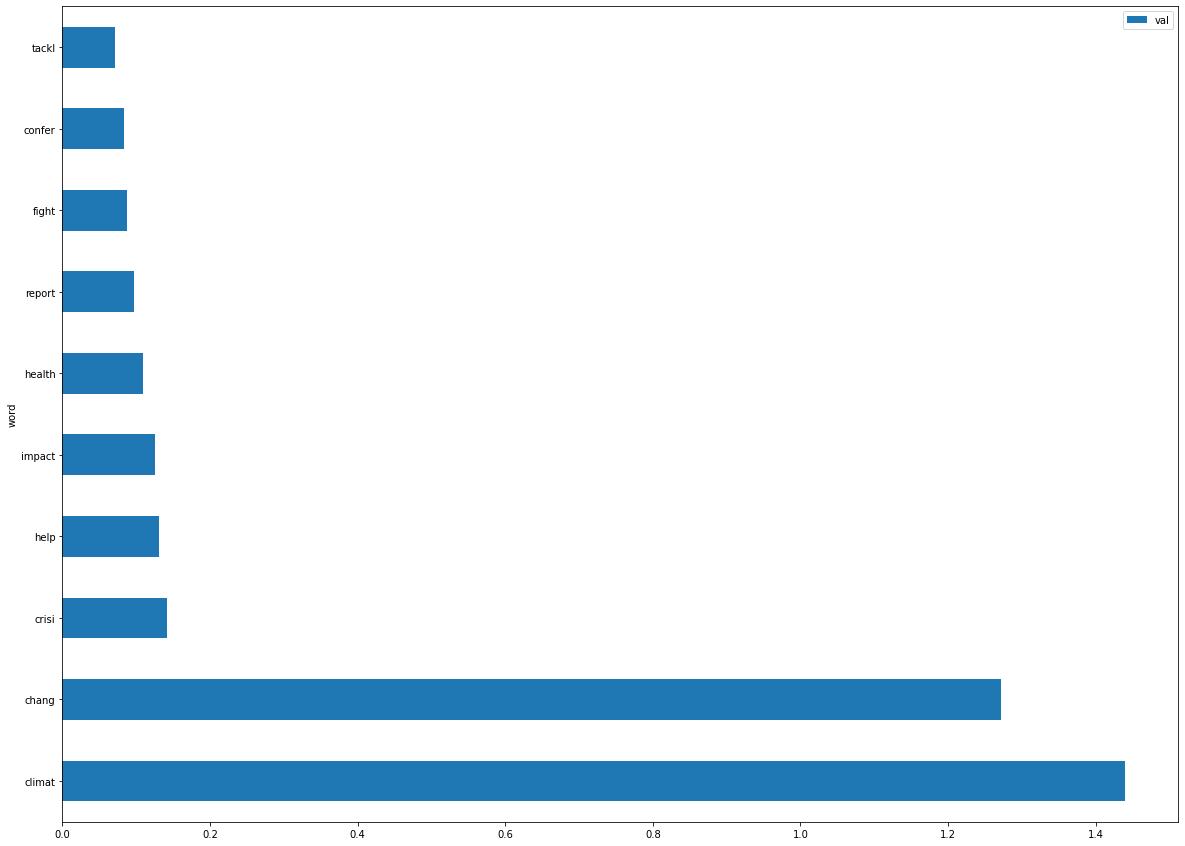

In [104]:
ax = topic1_top_words_df.plot.barh(x='word', y='val')

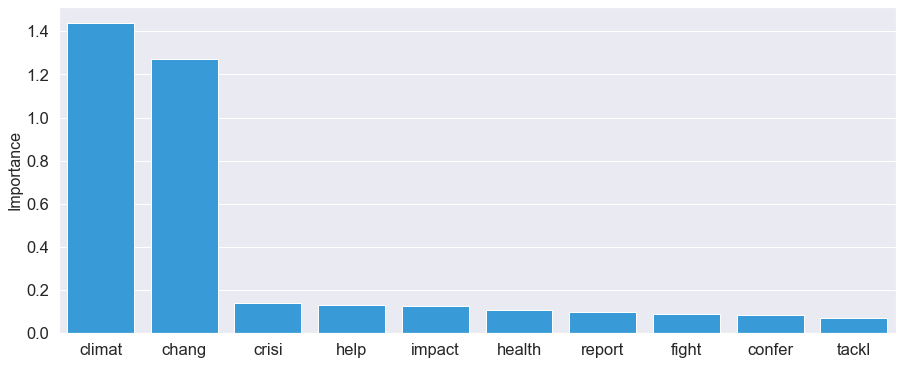

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.5)
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="word", y="val", data=topic1_top_words_df,color="#1DA1F2")
#ax.plot(x, y, label='big')
#ax.set_xlabel('Important Topic 1 Words in Twitter')
#fig.suptitle('test title', fontsize=20)
plt.xlabel('', fontsize=20)
plt.ylabel('Importance', fontsize=16)
plt.savefig('topic1.jpg')

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
'''sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="word", y="val", data=topic1_top_words_df,
            label="Topic 1: Word X Value", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Important Topic 1 Words in Twitter")
sns.despine(left=True, bottom=True)'''

'sns.set_theme(style="whitegrid")\n\n# Initialize the matplotlib figure\nf, ax = plt.subplots(figsize=(15, 15))\n\n# Load the example car crash dataset\n#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)\n\n# Plot the crashes where alcohol was involved\nsns.set_color_codes("muted")\nsns.barplot(x="word", y="val", data=topic1_top_words_df,\n            label="Topic 1: Word X Value", color="b")\n\n# Add a legend and informative axis label\nax.legend(ncol=2, loc="lower right", frameon=True)\nax.set(xlim=(0, 24), ylabel="",\n       xlabel="Important Topic 1 Words in Twitter")\nsns.despine(left=True, bottom=True)'

## Topic 2

In [26]:
for tweet in top_tweets(tweet_topic_matrix_df, 'topic_2', 15):
    print(tweet)
    print()

@vljjk @BTS_twt Dear friends💜 #ARMY pls 🙏Retweet for #SUGA invitation to the conference #time4truth It's abt #ClimateCrisis ecology, air pollution. Let's change the world for a better together🌏Thank you so much for your support🥰 
#BTS #BTSwithCS #BTS_WafeOfUnity_CS
https://t.co/XBqm3Du25z

@kim_042002 @BTS_twt Dear friends💜 #ARMY pls 🙏Retweet for #SUGA invitation to the conference #time4truth It's abt #ClimateCrisis ecology, air pollution. Let's change the world for a better together🌏Thank you so much for your support🥰 
#BTS #BTSwithCS #BTS_WafeOfUnity_CS
https://t.co/XBqm3Du25z

@Sunn_003 @BTS_twt Dear friends💜 #ARMY pls 🙏Retweet for #SUGA invitation to the conference #time4truth It's abt #ClimateCrisis ecology, air pollution. Let's change the world for a better together🌏Thank you so much for your support🥰 
#BTS #BTSwithCS #BTS_WafeOfUnity_CS
https://t.co/XBqm3Du25z

@btsthroughyears @BTS_twt Dear friends💜 #ARMY pls 🙏Retweet for #SUGA invitation to the conference #time4truth It's abt 

In [27]:
top_words(word_topic_matrix_df, 'topic_2', 10)

thank      0.674147
let        0.661849
invit      0.611905
confer     0.608257
friend     0.605050
support    0.584210
dear       0.581071
abt        0.580213
pollut     0.578125
retweet    0.571598
Name: topic_2, dtype: float64

In [28]:
root_df[root_df['content']== "@BTSBBHot100No1 @BTS_twt Dear friends💜 #ARMY pls 🙏Retweet for #SUGA invitation to the conference #time4truth It's abt #ClimateCrisis ecology, air pollution. Let's change the world for a better together🌏Thank you so much for your support🥰\\ #BTS #BTSwithCS #BTS_WafeOfUnity_CShttps://t.co/XBqm3Du25z"]

,twitter_id,content,removed_links,removed_users,removed_hashtags,removed_av,tokens,lemmatized,lang,stop_word,root,root_string


In [29]:
root_df[root_df['content'].str.contains("Dear friends💜 ")].shape

(23, 12)

In [30]:
root_df[root_df['content'].str.contains("Dear friends💜 ")]

,twitter_id,content,removed_links,removed_users,removed_hashtags,removed_av,tokens,lemmatized,lang,stop_word,root,root_string
5079,nati_nuts,@Sunn_003 @BTS_twt Dear friends💜 #ARMY pls 🙏Re...,@Sunn_003 @BTS_twt Dear friends💜 #ARMY pls 🙏Re...,Dear friends💜 #ARMY pls 🙏Retweet for #SUGA i...,Dear friends💜 pls 🙏Retweet for invitation ...,Dear friends💜 pls 🙏Retweet for invitation ...,dear friends pls retweet invitation conference...,dear friends pls retweet invitation conference...,en,"['dear', 'friends', 'pls', 'retweet', 'invitat...","['dear', 'friend', 'pls', 'retweet', 'invit', ...",dear friend pls retweet invit confer abt ecolo...
5085,nati_nuts,@Jungbook13 @BTS_twt Dear friends💜 #ARMY pls 🙏...,@Jungbook13 @BTS_twt Dear friends💜 #ARMY pls 🙏...,Dear friends💜 #ARMY pls 🙏Retweet for #SUGA i...,Dear friends💜 pls 🙏Retweet for invitation ...,Dear friends💜 pls 🙏Retweet for invitation ...,dear friends pls retweet invitation conference...,dear friends pls retweet invitation conference...,en,"['dear', 'friends', 'pls', 'retweet', 'invitat...","['dear', 'friend', 'pls', 'retweet', 'invit', ...",dear friend pls retweet invit confer abt ecolo...
5087,nati_nuts,@vljjk @BTS_twt Dear friends💜 #ARMY pls 🙏Retwe...,@vljjk @BTS_twt Dear friends💜 #ARMY pls 🙏Retwe...,Dear friends💜 #ARMY pls 🙏Retweet for #SUGA i...,Dear friends💜 pls 🙏Retweet for invitation ...,Dear friends💜 pls 🙏Retweet for invitation ...,dear friends pls retweet invitation conference...,dear friends pls retweet invitation conference...,en,"['dear', 'friends', 'pls', 'retweet', 'invitat...","['dear', 'friend', 'pls', 'retweet', 'invit', ...",dear friend pls retweet invit confer abt ecolo...
5088,nati_nuts,@Papapanida_s @BTS_twt Dear friends💜 #ARMY pls...,@Papapanida_s @BTS_twt Dear friends💜 #ARMY pls...,Dear friends💜 #ARMY pls 🙏Retweet for #SUGA i...,Dear friends💜 pls 🙏Retweet for invitation ...,Dear friends💜 pls 🙏Retweet for invitation ...,dear friends pls retweet invitation conference...,dear friends pls retweet invitation conference...,en,"['dear', 'friends', 'pls', 'retweet', 'invitat...","['dear', 'friend', 'pls', 'retweet', 'invit', ...",dear friend pls retweet invit confer abt ecolo...
5089,nati_nuts,@bysugapallet @BTS_twt Dear friends💜 #ARMY pls...,@bysugapallet @BTS_twt Dear friends💜 #ARMY pls...,Dear friends💜 #ARMY pls 🙏Retweet for #SUGA i...,Dear friends💜 pls 🙏Retweet for invitation ...,Dear friends💜 pls 🙏Retweet for invitation ...,dear friends pls retweet invitation conference...,dear friends pls retweet invitation conference...,en,"['dear', 'friends', 'pls', 'retweet', 'invitat...","['dear', 'friend', 'pls', 'retweet', 'invit', ...",dear friend pls retweet invit confer abt ecolo...
5090,nati_nuts,@hugteuk @BTS_twt Dear friends💜 #ARMY pls 🙏Ret...,@hugteuk @BTS_twt Dear friends💜 #ARMY pls 🙏Ret...,Dear friends💜 #ARMY pls 🙏Retweet for #SUGA i...,Dear friends💜 pls 🙏Retweet for invitation ...,Dear friends💜 pls 🙏Retweet for invitation ...,dear friends pls retweet invitation conference...,dear friends pls retweet invitation conference...,en,"['dear', 'friends', 'pls', 'retweet', 'invitat...","['dear', 'friend', 'pls', 'retweet', 'invit', ...",dear friend pls retweet invit confer abt ecolo...
5092,nati_nuts,@Lavende03 @BTS_twt Dear friends💜 #ARMY pls 🙏R...,@Lavende03 @BTS_twt Dear friends💜 #ARMY pls 🙏R...,Dear friends💜 #ARMY pls 🙏Retweet for #SUGA i...,Dear friends💜 pls 🙏Retweet for invitation ...,Dear friends💜 pls 🙏Retweet for invitation ...,dear friends pls retweet invitation conference...,dear friends pls retweet invitation conference...,en,"['dear', 'friends', 'pls', 'retweet', 'invitat...","['dear', 'friend', 'pls', 'retweet', 'invit', ...",dear friend pls retweet invit confer abt ecolo...
5095,nati_nuts,@taehyikes @BTS_twt Dear friends💜 #ARMY pls 🙏R...,@taehyikes @BTS_twt Dear friends💜 #ARMY pls 🙏R...,Dear friends💜 #ARMY pls 🙏Retweet for #SUGA i...,Dear friends💜 pls 🙏Retweet for invitation ...,Dear friends💜 pls 🙏Retweet for invitation ...,dear friends pls retweet invitation

## Topic 3

In [31]:
for tweet in top_tweets(tweet_topic_matrix_df, 'topic_3', 5):
    print(tweet)
    print()

🔵At least 23 countries have today made new commitments to phase out Coal power

🔵These countries include five of the world’s top 20 Coal power-using countries

🌀Burning coal is the single biggest cause of #ClimateChange

🫐https://t.co/UahjdUNmUi 

@UNFCCC #COP26

🔵At least 23 countries have today made new commitments to phase out Coal power

🔵These countries include five of the world’s top 20 Coal power-using countries

🌀Burning coal is the single biggest cause of #ClimateChange

🫐https://t.co/7ZBi1gmvWF 

@UNFCCC #COP26

#cc #climatechange RT @UNEP: RT @UNFCCC: At least 23 countries have today made new commitments to phase out coal power.

These countries include five of the world’s top…

It is meaningless because India &amp; China are not included. Some of those committed have already phased out coal! Some of those who committed used next to nothing!
#Coal #COP26 #India 
Over 40 Countries Pledge at U.N. Climate Summit to End Use of Coal Power https://t.co/v8RaGapSkY

More than 40 cou

In [32]:
#tweet = re.sub(r'\&\w*;', '', tweet)

In [33]:
top_words(word_topic_matrix_df, 'topic_3', 10)

countri      1.326730
coal         1.126021
power        0.621581
commit       0.435076
develop      0.405293
phase        0.327204
china        0.285508
australia    0.238067
pledg        0.237056
india        0.220185
Name: topic_3, dtype: float64

In [34]:
topic3_top_words = list(top_words(word_topic_matrix_df, 'topic_3', 10).index)

In [136]:
topic3_top_word_val = list(top_words(word_topic_matrix_df, 'topic_3', 10))

In [137]:
topic3_top_words = list(top_words(word_topic_matrix_df, 'topic_3', 10).index)

In [138]:
topic3_top_words_df = pd.DataFrame({'word':topic3_top_words,'val':topic3_top_word_val})

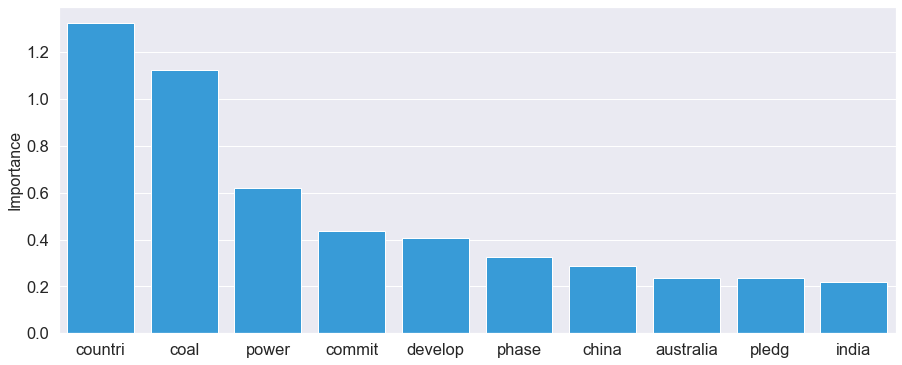

In [189]:
sns.set(font_scale=1.5)
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="word", y="val", data=topic3_top_words_df,color="#1DA1F2",saturation=0.75)
sns.set_style("whitegrid")
plt.xlabel('', fontsize=25)
plt.ylabel('Importance', fontsize=16)
plt.savefig('test.jpg')

## Topic 4

In [35]:
for tweet in top_tweets(tweet_topic_matrix_df, 'topic_4', 5):
    print(tweet)
    print()

And we’re done for the day #COP26 https://t.co/j219cnwcTv

Another day for #COP26NairobiHub  #COP26 #GlasgowCop26 @WeDontHaveTime @wnyakera @Patkiash We have something we all can do https://t.co/NFbK2iYfLL

#COP26 Finance day 
https://t.co/DNV139RpZ9 https://t.co/XbcuXPJqdW

Home for some days.
#Troon #GlasgowCop26 https://t.co/fonSzJ0p4i

Finance Day at #COP26 did not disappoint. Read our review of day 2 here: https://t.co/vviF1V294l
#climatechange #insurance #insuranceindustry #togetherforourplanet



In [36]:
top_words(word_topic_matrix_df, 'topic_4', 10)

day         2.265781
energi      0.494165
today       0.224585
financ      0.202787
post        0.153516
renew       0.112007
clean       0.110344
checkout    0.109077
talk        0.108265
read        0.098996
Name: topic_4, dtype: float64

## Topic 5

In [37]:
for tweet in top_tweets(tweet_topic_matrix_df, 'topic_5', 5):
    print(tweet)
    print()

#COP26Glasgow the world leaders see that we are in a #ClimateCrisis. This is a failure on them. 
https://t.co/JJJaSYfucJ

#GlasgowCop26 #ClimateAction  when you look at the leaders in the world and the caliber of them it does not forebode well for our world. #auspol #G20RomeSummit

WORLD leaders of more than 40 countries have backed a plan to deliver clean, affordable technology around the world by 2030.

#cop26 #technology #2030 #climatechange #borisjohnson #glasgow

https://t.co/tmERPZEG5b

This is what is posing as the Leader of The Free World at  #GlasgowCop26 

#InternationalEmbarrassment https://t.co/Lj7I8mU93F

Incredible speech!  Please share to encourage our world leaders to lead. #COP26Glasgow #ClimateCrisis #ClimateActionNow https://t.co/VP1DOYxtVa



In [38]:
top_words(word_topic_matrix_df, 'topic_5', 10)

world     1.716555
leader    1.100187
speech    0.163223
use       0.154482
look      0.126884
lead      0.125556
urg       0.093408
meet      0.090099
summit    0.087707
face      0.081959
Name: topic_5, dtype: float64

## Topic 6

In [191]:
for tweet in top_tweets(tweet_topic_matrix_df, 'topic_6', 20):
    print(tweet)
    print()

Global Warm Inc https://t.co/36t87uXMr6 #GlobalWarming #Earth #drawing #world #logo #pollution #space #climatechange #environmental

#Act joins global call to ... 
https://t.co/3deU7LLuqS
#ACTGovernment #AusPol #Australia #Australian #AustralianGreens #ClimateChange #Commonwealth #EnergyEfficiency #EnvironmentallySustainable #Federal #FederalGovernment #ForeignAffairs #GlobalWarming #RenewableEnergy #UK https://t.co/Bkmj7EJzS8

On December 4, 2021 there will be an International Global Online Conference ”Global Crisis. Time for the truth”. Join in, it's already about everyone.
#GlobalCrisis
#ClimateCrisis
#Time4Truth https://t.co/GyJ6i3UxAP

@_GlobalCrisis_ On December 4, 2021 there will be an International Global Online Conference ”Global Crisis. Time for the truth”. Join in, it's already about everyone.
#GlobalCrisis
#ClimateCrisis
#Time4Truth

@_GlobalCrisis_ It’s great! On December 4, 2021 there will be an International Global Online Conference ”Global Crisis. Time for the truth”. P

In [40]:
top_words(word_topic_matrix_df, 'topic_6', 10)

global    2.037151
warm      0.594430
crisi     0.466864
confer    0.279177
human     0.265010
truth     0.263242
intern    0.191000
emiss     0.189545
reduc     0.167453
join      0.149069
Name: topic_6, dtype: float64

In [182]:
topic6_top_words = list(top_words(word_topic_matrix_df, 'topic_6', 10).index)
topic6_top_word_val = list(top_words(word_topic_matrix_df, 'topic_6', 10))
topic6_top_words_df = pd.DataFrame({'word':topic6_top_words,'val':topic6_top_word_val})

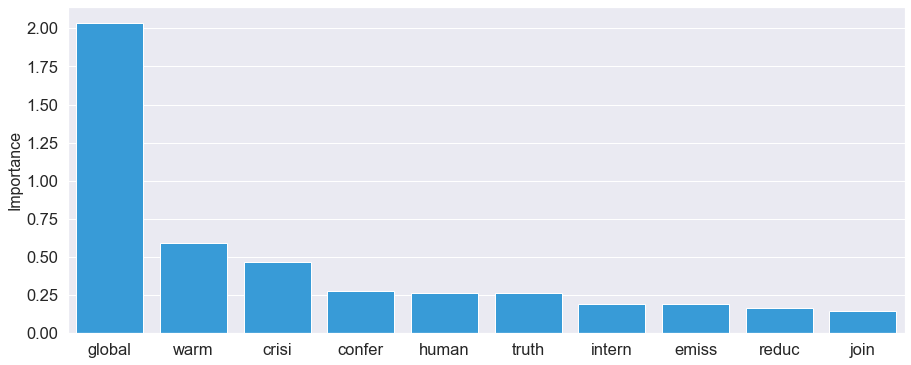

In [190]:
sns.set(font_scale=1.5)
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="word", y="val", data=topic6_top_words_df,color="#1DA1F2",saturation=0.75)
sns.set_style("whitegrid")
plt.xlabel('', fontsize=25)
plt.ylabel('Importance', fontsize=16)
plt.savefig('test.jpg')

## Topic 7

In [42]:
for tweet in top_tweets(tweet_topic_matrix_df, 'topic_7', 5):
    print(tweet)
    print()

Climate Action is Action for Life! 

#COP26  #ClimateAction #ClimateCrisis 
#climatechange
#GlasgowCop26 #COP26 #COPS26NairobiHub

We need to move now to action. #glasgowcop26 @Jveivoire  @JVEBurkinaFaso @Jve_Senegal @saniayoub @senalouka @WoMin_Africa #africaclimatejustice https://t.co/6MBSSFJMT2

https://t.co/WHP0ygVjUy - Climate Action Plan 2021 - #climatechange  https://t.co/RlstfyBGF9

Times is now to action. #glasgowcop26 @Jveivoire  @JVEBurkinaFaso @Jve_Senegal @saniayoub @senalouka @WoMin_Africa #africaclimatejustice https://t.co/6MBSSFJMT2

How do you support climate action?#COP26Glasgow #ClimateEmergency #ClimateAction #ClimateCrisis #AcademicTwitter @PhD_Genie @OpenAcademics https://t.co/jb95aL84Vf



In [43]:
top_words(word_topic_matrix_df, 'topic_7', 10)

action      2.089833
climat      0.319723
plan        0.312350
urgent      0.111347
support     0.109328
talk        0.098813
demand      0.093736
nation      0.088258
consequ     0.086149
activist    0.083289
Name: topic_7, dtype: float64

## Topic 8

In [44]:
for tweet in top_tweets(tweet_topic_matrix_df, 'topic_8', 5):
    print(tweet)
    print()

They really don't nd we're really out of time. #ClimateAction #ClimateCrisis #ActOnClimate https://t.co/Ohh9pzwuLi

We have 7 years. It is time to power change. Act in time.
@ClimateClockBot @ClimateclockW @Y2YWBG @coy16glasgow @COP26

#COY16 #COP26 #ClimateClock #ActNow https://t.co/bTuyhPUMoF

#ZimbabweRising!🇿🇼

#pfumvudza #intwasa #climatechange 🚜🌽

Its that time of year again!😅
@MoLAFWRR_Zim @basera_john @arda_zim @agribusiness110 @WendyMadzura @ZANUPF_Official @zanupf_patriots @nickmangwana @Jamwanda2 @Lee_Ann_Cara @MelodyChakatsva @nicolehondo @KMutisi @kmugova https://t.co/QtA9kLfPR0

Times is now to action. #glasgowcop26 @Jveivoire  @JVEBurkinaFaso @Jve_Senegal @saniayoub @senalouka @WoMin_Africa #africaclimatejustice https://t.co/6MBSSFJMT2

It's time for the truth #CreativeSociety
#GlobalCrisis
#Time4Truth
#ClimateCrisis
#ClimateChange https://t.co/7WapIyHH1z



In [45]:
top_words(word_topic_matrix_df, 'topic_8', 10)

time       2.255207
truth      0.294310
act        0.269167
year       0.257368
alt        0.181569
crisi      0.180199
run        0.179463
pass       0.118169
kingdom    0.107043
wast       0.102167
Name: topic_8, dtype: float64

## Topic 9

In [46]:
for tweet in top_tweets(tweet_topic_matrix_df, 'topic_9', 5):
    print(tweet)
    print()

https://t.co/usc93lsbbK Saving the planet #COP26Glasgow #bbcnews #Glasgow #GlasgowCop26  @COP26 @BorisJohnson @JeffBezos

Saving the Planet and Saving Our Economy https://t.co/VmsdnnEXMU #ClimateChange #FossilFuelSubsidies #CarbonTax #RenewableEnergy @intpolicydigest https://t.co/Uzts3wMwQl

@adoniaayebare #COP26 #COP26Glasgow is our only &amp; last chance to save the planet

All the important ones have gone to #GlasgowCop26  to save the planet as a whole, except for Palestine, because there is nothing to save. #matura2021 https://t.co/mwJbhYoQiQ

It's not about "Saving the Planet" It's about Money 💵. This Is Green Capitalism in your face #COP26 #GlasgowCop26 #ClimateCrisis @news24 @Fin24 @CyrilRamaphosa &amp; other world leaders &amp; Billionaires could care less about the Planet
https://t.co/tEGdMnW4hu
https://t.co/tEGdMnW4hu



In [47]:
top_words(word_topic_matrix_df, 'topic_9', 10)

planet       1.622646
save         1.179918
futur        0.379585
help         0.265245
human        0.223820
protect      0.181315
earth        0.178280
green        0.160363
let          0.151081
technolog    0.139227
Name: topic_9, dtype: float64

Text(0, 0.5, 'Importance')

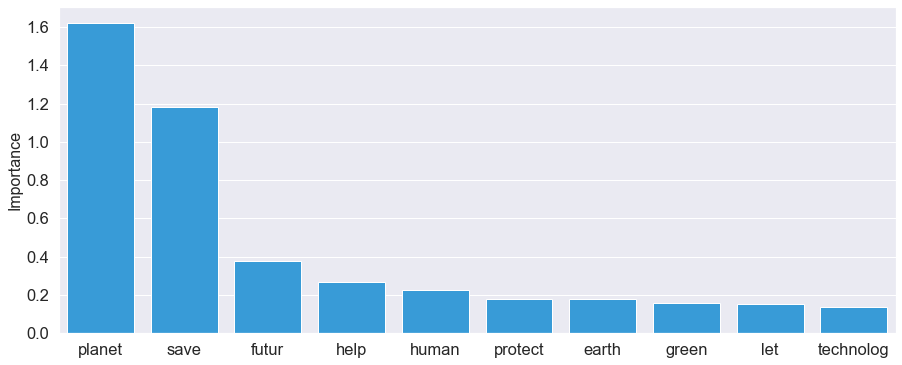

In [184]:
topic9_top_words = list(top_words(word_topic_matrix_df, 'topic_9', 10).index)
topic9_top_word_val = list(top_words(word_topic_matrix_df, 'topic_9', 10))
topic9_top_words_df = pd.DataFrame({'word':topic9_top_words,'val':topic9_top_word_val})
sns.set(font_scale=1.5)
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="word", y="val", data=topic9_top_words_df,color="#1DA1F2",saturation=0.75)
sns.set_style("whitegrid")
plt.xlabel('', fontsize=25)
plt.ylabel('Importance', fontsize=16)
#fig.savefig('test.jpg')

## Topic 10

In [49]:
for tweet in top_tweets(tweet_topic_matrix_df, 'topic_10', 5):
    print(tweet)
    print()

We need actions not words. 
And we need #ClimateAction now!!

#COP26 #COP26Glasow #GlasgowCop26 https://t.co/H0KREt4PAT

#cop26 @IPCC_CH @GretaThunberg this is what we're doing.

It needs to stop.

#liftyoureyes #ClimateAction #ClimateCrisis #ClimateEmergency #climateeducation https://t.co/6DuohGGNbj

We need to move now to action. #glasgowcop26 @Jveivoire  @JVEBurkinaFaso @Jve_Senegal @saniayoub @senalouka @WoMin_Africa #africaclimatejustice https://t.co/6MBSSFJMT2

A climate lens is needed for every decision, program and policy. We need to get serious, we need to get specific and we need to do this fast.

Thanks to @ResiliencebyD and everyone involved in these conversations. #ClimateCrisis #Leadership 

https://t.co/laW7sZNe3c

Back to basics: What do we need?
We need to meet our needs without fossil fuels.
It may be easier said than done, but that's it. 
#COP26 #ClimateChange #MBpoli #CDNpoli https://t.co/m0u7vfgLG7



In [50]:
top_words(word_topic_matrix_df, 'topic_10', 10)

need       2.081800
stop       0.358235
solut      0.213740
real       0.192752
act        0.160339
clear      0.130316
offset     0.128674
voic       0.125434
know       0.125143
address    0.118322
Name: topic_10, dtype: float64

## Topic 11

In [91]:
for tweet in top_tweets(tweet_topic_matrix_df, 'topic_11', 10):
    print(tweet)
    print()

Getting to net-zero emissions - what role ... 
https://t.co/CzPHXC9QCe
#British #Canada #ClimateChange #ClimateCrisis #Environment #GlobalHealth #GreenhouseGasEmissions #Infrastructure #Leadership #ProfessionalDevelopment #PublicHealth #Sustainability #Sustainable #University https://t.co/RlMtr1NsIp

The problem with 'net zero' and carbon offsets. We also need to address historical emissions, not just future ones. #ClimateCrisis #COP26 https://t.co/LquDmYJJrQ

Carbon emissions insights tool will guide businesses towards net zero #ClimateCrisis #carbonemissions
#NetZero #business
https://t.co/RDzw3U9ein https://t.co/2WGPrvHSIx

Curchods aim to be carbon neutral in 2022.⁠ ⁠We've taken the first step to achieving net zero emissions by being carbon-assessed ...
#movingtoabetterfuture @CarbonAcademy @GetSurrey @TheNeg @PropIndEye @EAToday @AngelsMedia #netzero #climatechange
https://t.co/hbv656TaSI https://t.co/FTZKcf9pCC

Carbon offsets are not real solutions! We need to reach REAL ZERO no

In [52]:
top_words(word_topic_matrix_df, 'topic_11', 10)

zero      1.103668
emiss     0.871222
net       0.844453
carbon    0.682205
achiev    0.207572
cut       0.167573
reduc     0.164893
target    0.161783
futur     0.153010
solut     0.139267
Name: topic_11, dtype: float64

## Topic 12

In [90]:
for tweet in top_tweets(tweet_topic_matrix_df, 'topic_12', 10):
    print(tweet)
    print()

If 🇨🇦 is serious about ending financing for fossil fuel projects, it can start here --&gt; 🔗https://t.co/s6iYaDrjA6

#COP26 #FossilFreeFinance #StopFundingFossils https://t.co/0HmokJPc8k

If Canada is serious about ending financing for fossil fuel projects, it can start here --&gt; 🔗https://t.co/vf6lCY57VJ

#COP26 #FossilFreeFinance #StopFundingFossils https://t.co/Q60Lz2vC23

But public finance for international fossil fuels abroad is just one sliver of global fossil fuel financing, and pales in comparison to fossil fuel finance from the top 5 US banks alone. 😱 #COP26 #DefundClimateChaos

Data via https://t.co/wIuk8IicK2 https://t.co/Q6uxSlrfS1

20 countries, including the United States &amp; Canada, have promised to stop public financing of fossil fuel projects abroad by the end of next year, representing ~$18 billion each year in international fossil fuel projects, per @PriceofOil. #COP26
https://t.co/hjBesOEHQ2

Banks are still financing fossil fuels – while signing up to #NetZero 

In [54]:
top_words(word_topic_matrix_df, 'topic_12', 10)

fuel       1.455188
fossil     1.343760
stop       0.522024
financ     0.444268
project    0.404634
end        0.334854
pledg      0.268575
bank       0.236582
canada     0.232693
oil        0.194776
Name: topic_12, dtype: float64

## Topic 13

In [89]:
for tweet in top_tweets(tweet_topic_matrix_df, 'topic_13', 10):
    print(tweet)
    print()

Find out how COP26 is going #ClimateChange https://t.co/RAaiZfGZy8

What's happening at the COP26? #COP26 #COP26Glasgow #ClimateEmergency https://t.co/NFfl6Hatoy

COP26 #CLIMATE Summit: What Happened During the First Days https://t.co/OfDTcs6yqs #GPWX #GlobalWarming #climatechange

COP26 #CLIMATE Summit: What Happened During the First Days https://t.co/n2PL1AzRYe  #GlobalWarming #climatechange

Didn’t we take one of these to Glasgow &amp; #COP26 https://t.co/u9CFxEgXY5

Check out "COP26 Live" https://t.co/YnlFXIGXHr @Eventbrite #COP26

Extinction Rebellion Take To The Glasgow Streets During COP26

https://t.co/WixhZU3VlE

#COP26 
#ExtinctionRebellion 
#GlasgowCop26 
#Scotland
#ClimateAction
#Greenwash https://t.co/Q7Cc11ArfO

Never trust a COP. #COP26 #ClimateCrisis #ClimateJustice #climate #ClimateAction #ClimateStrike #ClimateActionIRL https://t.co/pViGM2sF88

bringing around 20 American trucks to the city and more then 10 Airplanes of Logistics for Cop26... Priceless... So proud of 

In [56]:
top_words(word_topic_matrix_df, 'topic_13', 10)

cop        1.721226
glasgow    1.060956
summit     0.407709
happen     0.292432
look       0.147089
confer     0.136966
live       0.133253
week       0.129490
link       0.118281
meet       0.116690
Name: topic_13, dtype: float64

## Topic 14

In [88]:
for tweet in top_tweets(tweet_topic_matrix_df, 'topic_14', 10):
    print(tweet)
    print()

@donwinslow It's the young people that will save us. #ClimateCrisis

Congratulations @ARationalFear !!  The big rejection by the people for the people of our lying, #ClimateChange denying unrepresentative #government.  🙏👏👏👏👏 https://t.co/kz76cWC55s

Congratulations!!  The big rejection by the people for the people of our lying, #ClimateChange denying unrepresentative #government.  🙏👏👏👏👏 https://t.co/kz76cWC55s

People, wake up #CreativeSociety
#Time4Truth #ClimateCrisis
#ClimateChange
#Climate #extinction https://t.co/UVxZqO2JlE

understanding of the potential for water management to reduce emissions can support global climate action. To quote JFK,: “Our problems are made by people therefore they can be solved by people. And people can be as big as they want”.  #GlasgowCop26 #COPS26NairobiHub

#Glasgow #GlasgowCop26 
Make people #drive less #car
And give people less company cars...
There are so many that could just ride a #bike to #work or take the #bus #publictransport
But people are 

In [58]:
top_words(word_topic_matrix_df, 'topic_14', 10)

peopl      1.558047
young      0.418627
know       0.252676
like       0.226559
want       0.211167
talk       0.199413
right      0.173964
affect     0.152650
indigen    0.152603
big        0.133340
Name: topic_14, dtype: float64

Text(0, 0.5, 'Importance')

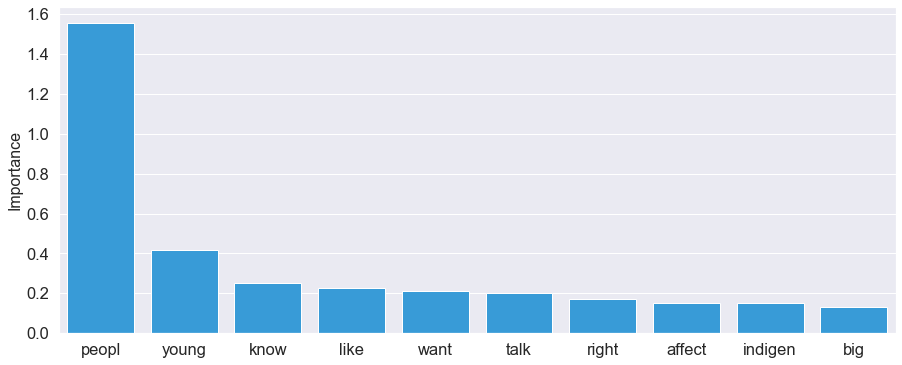

In [185]:
topic14_top_words = list(top_words(word_topic_matrix_df, 'topic_14', 10).index)
topic14_top_word_val = list(top_words(word_topic_matrix_df, 'topic_14', 10))
topic14_top_words_df = pd.DataFrame({'word':topic14_top_words,'val':topic14_top_word_val})
sns.set(font_scale=1.5)
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="word", y="val", data=topic14_top_words_df,color="#1DA1F2",saturation=0.75)
sns.set_style("whitegrid")
plt.xlabel('', fontsize=25)
plt.ylabel('Importance', fontsize=16)
#fig.savefig('test.jpg')

# Topic & Top Words Table

In [60]:
topic_topword_df = pd.DataFrame(columns=['topics','terms'])

In [61]:
topics = ['Topic 1','Topic 2','Topic 3','Topic 4','Topic 5']
          

In [62]:
topic_topword_df['topics'] = topics

In [63]:
topic_topword_df

,topics,terms
0,Topic 1,NaN
1,Topic 2,NaN
2,Topic 3,NaN
3,Topic 4,NaN
4,Topic 5,NaN


In [64]:
terms = [topic1_top_words,topic3_top_words, topic6_top_words,topic9_top_words,topic14_top_words]

In [65]:
topic_topword_df['terms'] = terms

In [66]:
text1 = ", ".join(review for review in topic_topword_df['terms'][0])

In [67]:
text2 = ", ".join(review for review in topic_topword_df['terms'][1])

In [68]:
text3 = ", ".join(review for review in topic_topword_df['terms'][2])

In [69]:
text4 = ", ".join(review for review in topic_topword_df['terms'][3])

In [70]:
text5 = ", ".join(review for review in topic_topword_df['terms'][4])

In [71]:
term_text = [text1,text2,text3,text4,text5]

In [72]:
topic_topword_df['terms_text'] = term_text

In [73]:
topic_topword_df

,topics,terms,terms_text
0,Topic 1,"[climat, chang, crisi, help, impact, health, r...","climat, chang, crisi, help, impact, health, re..."
1,Topic 2,"[countri, coal, power, commit, develop, phase,...","countri, coal, power, commit, develop, phase, ..."
2,Topic 3,"[global, warm, crisi, confer, human, truth, in...","global, warm, crisi, confer, human, truth, int..."
3,Topic 4,"[planet, save, futur, help, human, protect, ea...","planet, save, futur, help, human, protect, ear..."
4,Topic 5,"[peopl, young, know, like, want, talk, right, ...","peopl, young, know, like, want, talk, right, a..."


In [81]:
topic_topword_df.to_csv("topic_topword_df.csv", index=False)

# WordClouds ( 5 Topics) 

In [76]:
#!pip install wordcloud
from wordcloud import WordCloud

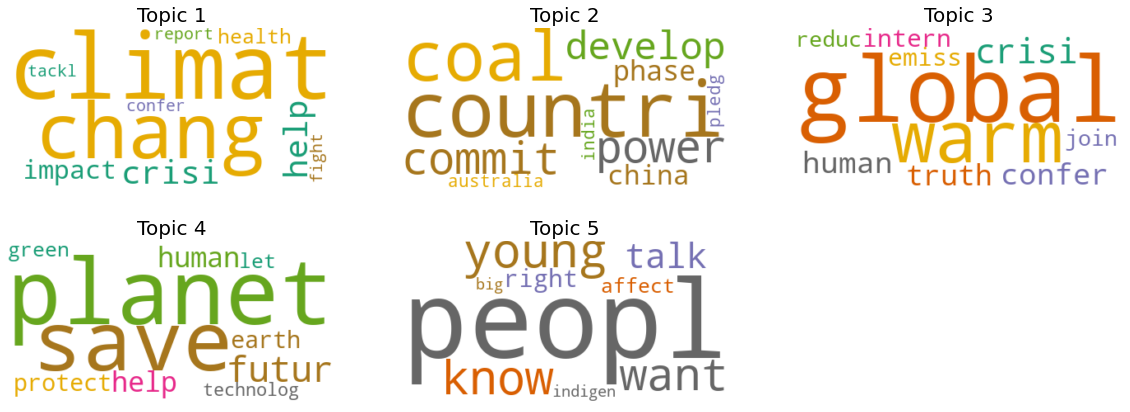

In [87]:
import matplotlib.pyplot as plt
# initiate wordcloud object
wc = WordCloud(background_color="white", colormap="Dark2", max_font_size=150, random_state=42)

# set the figure size
plt.rcParams['figure.figsize'] = [20, 15]

# Create subplots for each topic
for i in range(5):

    wc.generate(text=topic_topword_df["terms_text"][i])
    
    plt.subplot(4, 3, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(topic_topword_df.topics[i], size=20)

plt.show()